In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install SciPy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras-lookahead

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install typeguard

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

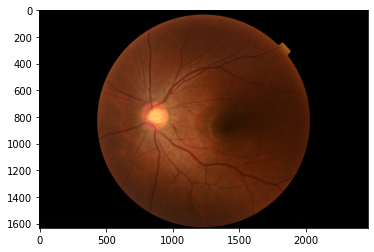

In [9]:
img = image.load_img("/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Train/Normal/NL_001.PNG")
plt.imshow(img)

In [10]:
DESIRED_ACCURACY = 0.979

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255) 


train_generator = train_datagen.flow_from_directory(
        '/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Train/',  # This is the source directory for training images
        target_size=(200, 200),  
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary', color_mode="grayscale") 



Found 160 images belonging to 2 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
        '/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Validation/',  # This is the source directory for training images
        target_size=(200, 200), 
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary', color_mode="grayscale")

Found 40 images belonging to 2 classes.


In [13]:
train_generator.image_shape

(200, 200, 1)

In [14]:
validation_generator.image_shape

(200, 200, 1)

In [15]:
train_generator.class_indices

{'Cataract': 0, 'Normal': 1}

In [16]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
tf.compat.v1.disable_eager_execution()


In [18]:
from tensorflow.keras.optimizers import RMSprop



model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
])




model.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=0.001),
               metrics=['accuracy']) 



In [19]:
history = model.fit(train_generator, epochs=55,
                    validation_data = validation_generator,
                    callbacks=[callbacks]) 

Epoch 1/55
5/5 [==============================] - ETA: 0s - batch: 2.0000 - size: 32.0000 - loss: 2.7103 - accuracy: 0.4875

/Users/iyamahoseremem/miniforge3/envs/ai_prac/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5/5 [==============================] - 21s 4s/step - batch: 2.0000 - size: 32.0000 - loss: 2.7103 - accuracy: 0.4875 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 2/55
5/5 [==============================] - 15s 4s/step - batch: 2.0000 - size: 32.0000 - loss: 0.7024 - accuracy: 0.4750 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 3/55
5/5 [==============================] - 15s 3s/step - batch: 2.0000 - size: 32.0000 - loss: 0.6904 - accuracy: 0.5500 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 4/55
5/5 [==============================] - 16s 4s/step - batch: 2.0000 - size: 32.0000 - loss: 0.7004 - accuracy: 0.4875 - val_loss: 0.6831 - val_accuracy: 0.4750
Epoch 5/55
5/5 [==============================] - 14s 3s/step - batch: 2.0000 - size: 32.0000 - loss: 0.6608 - accuracy: 0.6125 - val_loss: 0.7164 - val_accuracy: 0.5000
Epoch 6/55
5/5 [==============================] - 15s 4s/step - batch: 2.0000 - size: 32.0000 - loss: 0.7155 - accuracy: 0.5125 - val_loss: 0.6739 - val_accuracy

In [20]:
model.evaluate(validation_generator)

[0.660089784860611, 0.8]

In [21]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator)

/Users/iyamahoseremem/miniforge3/envs/ai_prac/lib/python3.8/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


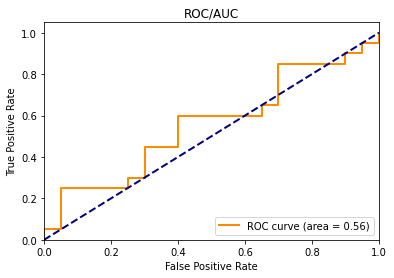

<Figure size 2160x1080 with 0 Axes>

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC/AUC')
plt.legend(loc="lower right")
plt.figure(figsize=(30,15))
plt.show()